In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5196,spam,Spook up your mob with a Halloween collection ...,NaN,NaN,NaN
2192,ham,Congrats ! Treat pending.i am not on mail for ...,NaN,NaN,NaN
4162,ham,I told that am coming on wednesday.,NaN,NaN,NaN
5134,ham,Sday only joined.so training we started today:),NaN,NaN,NaN
550,ham,Imagine you finally get to sink into that bath...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...
1699,ham,Ok...
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
4773,ham,U repeat e instructions again. Wat's e road na...
2292,ham,:-( that's not v romantic!


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4873,ham,Wat happened to the cruise thing
1929,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
4531,ham,Ok both our days. So what are you making for d...
80,ham,"Sorry, I'll call later"
2533,ham,Glad it went well :) come over at 11 then we'l...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [13]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

## 2.EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

,count
target,
0,4516
1,653


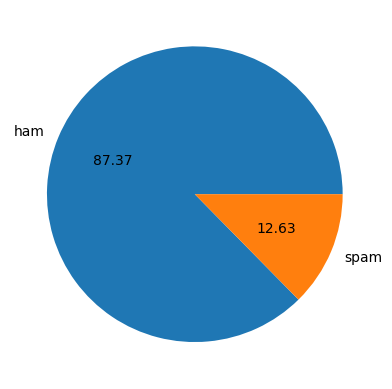

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
# Using a simpler tokenization method as NLTK punkt tokenizer is causing issues
import string
df['num_words'] = df['text'].apply(lambda x: len([word for word in x.split() if word.strip() and word not in string.punctuation]))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [28]:
# num of sentences
# Using a simpler tokenization method as NLTK punkt tokenizer is causing issues
import re
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1 if re.split(r'[.!?]+', x)[-1] == '' else len(re.split(r'[.!?]+', x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.199652,2.341265
std,58.236293,10.897425,1.710580
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [31]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.015058,2.141275
std,56.358207,10.947038,1.602176
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,39.000000


In [32]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.392037,3.724349
std,30.137753,5.873101,1.795693
min,13.000000,2.000000,1.000000
25%,132.000000,21.000000,2.000000
50%,149.000000,25.000000,4.000000
75%,157.000000,27.000000,5.000000
max,224.000000,34.000000,10.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

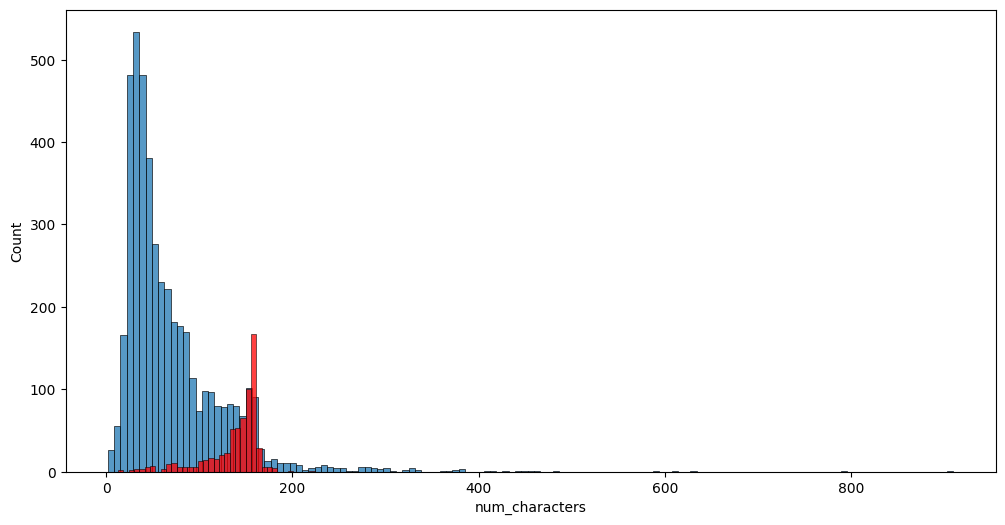

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

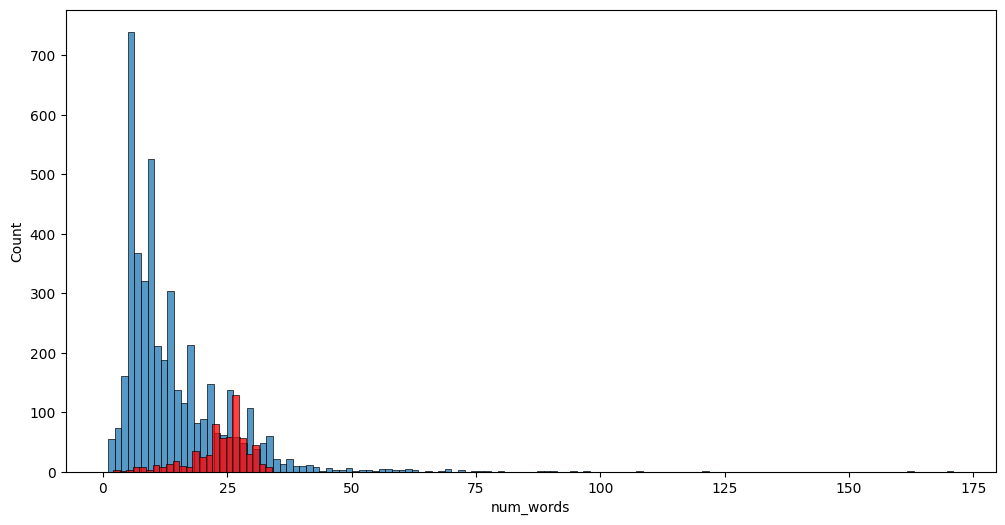

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

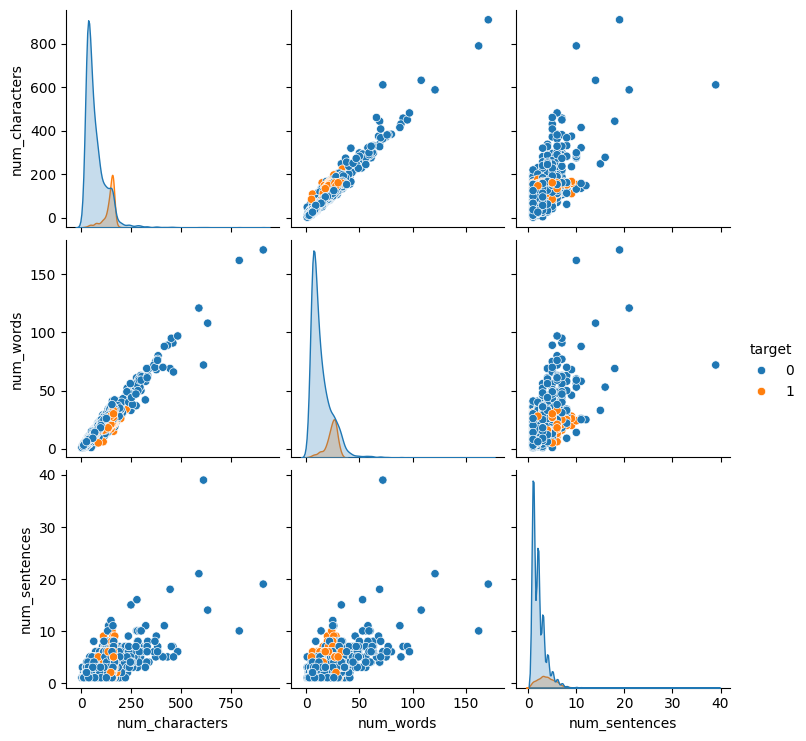

In [36]:
sns.pairplot(df,hue='target')

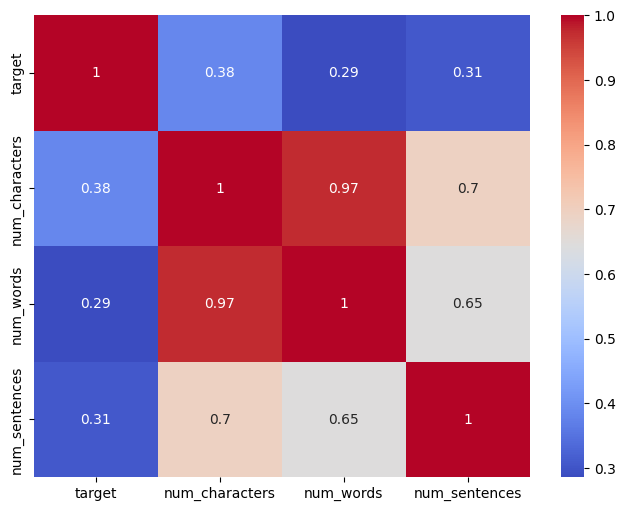

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), cmap="coolwarm" , annot=True)
plt.show()

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [38]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Download resources (run only once)
nltk.download('stopwords')


ps = PorterStemmer()

def transform_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Tokenize (using simpler method)
    # text = nltk.word_tokenize(text) # Original line
    text = [word for word in text.split() if word.strip()] # Simpler tokenization

    # 3. Keep only alphanumeric
    text = [i for i in text if i.isalnum()]

    # 4. Remove stopwords and punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # 5. Stemming
    text = [ps.stem(i) for i in text]

    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon want talk stuff anymor cri enough'

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
ps.stem('loving')

'love'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

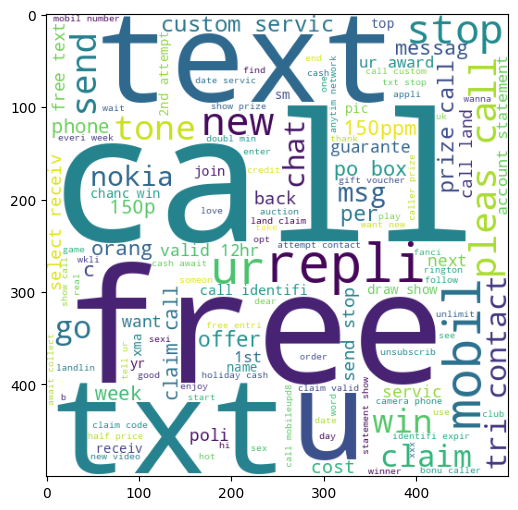

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

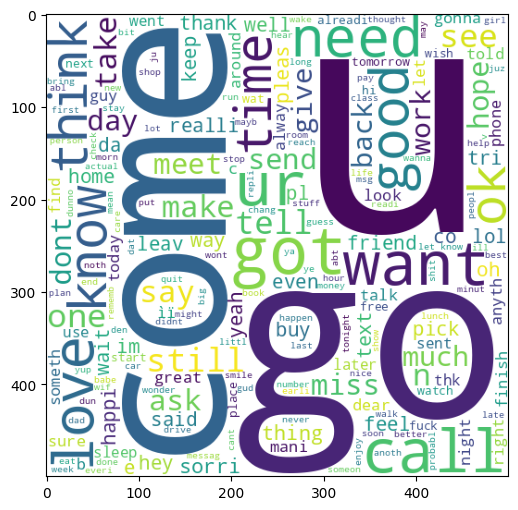

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [51]:
len(spam_corpus)

8176

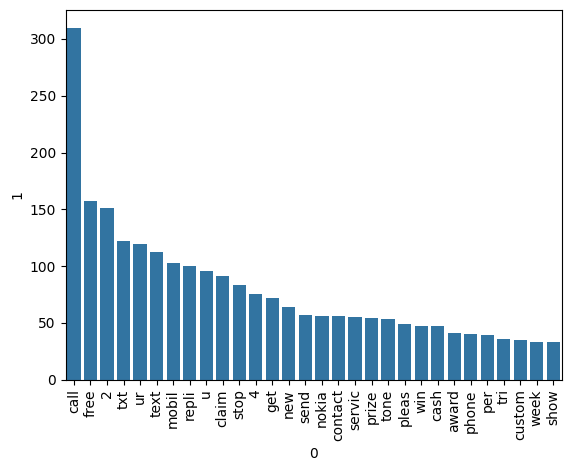

In [52]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

27382

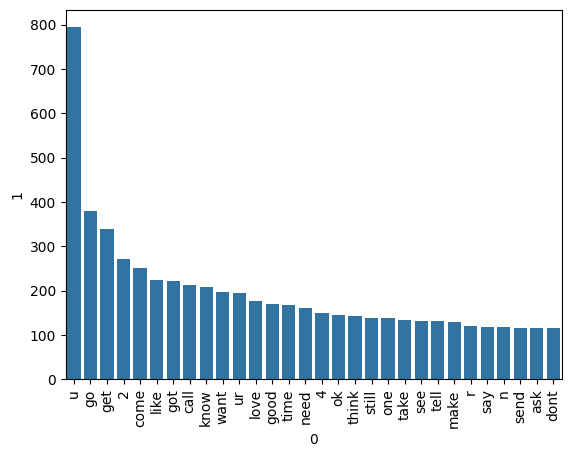

In [55]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


## 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score,classification_report


In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1 Score:", f1_score(y_test, y_pred1))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Accuracy: 0.7940038684719536
Precision: 0.37623762376237624
Recall: 0.8260869565217391
F1 Score: 0.5170068027210885
Confusion Matrix:
 [[707 189]
 [ 24 114]]


In [108]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))


print(classification_report(y_test, y_pred2, target_names=['Ham', 'Spam']))


Accuracy: 0.9632495164410058
Precision: 0.9807692307692307
Recall: 0.7391304347826086
F1 Score: 0.8429752066115702
Confusion Matrix:
 [[894   2]
 [ 36 102]]
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       896
        Spam       0.98      0.74      0.84       138

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



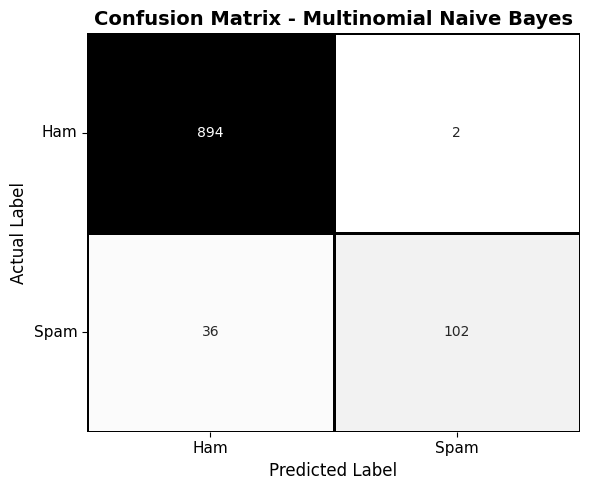

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred2 are defined
cm = confusion_matrix(y_test, y_pred2)
labels = ['Ham', 'Spam']

# Plot heatmap (grayscale for B/W printing)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False, linewidths=1, linecolor='black')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.title('Confusion Matrix - Multinomial Naive Bayes', fontsize=14, fontweight='bold')
plt.xticks(ticks=[0.5,1.5], labels=labels, fontsize=11)
plt.yticks(ticks=[0.5,1.5], labels=labels, fontsize=11, rotation=0)
plt.tight_layout()
plt.show()


In [69]:
import pandas as pd

# Classification report data
report_data = {
    'Class': ['Ham', 'Spam', 'Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Precision': [0.96, 0.98, '-', 0.97, 0.96],
    'Recall': [1.00, 0.74, '-', 0.87, 0.96],
    'F1 Score': [0.98, 0.84, 0.96, 0.91, 0.96],
    'Support': [896, 138, 1034, 1034, 1034]
}

# Create DataFrame
df_report = pd.DataFrame(report_data)

# Round numbers (optional)
df_report[['Precision','Recall','F1 Score']] = df_report[['Precision','Recall','F1 Score']].round(2)

# Styling for A4 report
styled_report = (
    df_report.style
    .set_properties(**{
        'color': 'black',
        'font-size': '11pt',
        'text-align': 'center',
        'padding': '6px'
    })
    .set_table_styles([
        {'selector': 'table', 'props': [
            ('border-collapse', 'collapse'),
            ('width', '60%'),
            ('border', '1px solid black')
        ]},
        {'selector': 'th', 'props': [
            ('border', '1px solid black'),
            ('text-align', 'center'),
            ('font-weight', 'bold'),
            ('font-size', '11pt'),
            ('background-color', '#ffffff'),
            ('color', 'black'),
            ('padding', '6px')
        ]},
        {'selector': 'td', 'props': [
            ('border', '1px solid black'),
            ('padding', '6px')
        ]},
        {'selector': 'caption', 'props': [
            ('caption-side', 'top'),
            ('font-size', '12pt'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('color', 'black'),
            ('padding-bottom', '10px')
        ]}
    ])
    .set_caption("Classification Report - Multinomial Naive Bayes")
)

# Display in Colab
styled_report


,Class,Precision,Recall,F1 Score,Support
0,Ham,0.960000,1.000000,0.980000,896
1,Spam,0.980000,0.740000,0.840000,138
2,Accuracy,-,-,0.960000,1034
3,Macro Avg,0.970000,0.870000,0.910000,1034
4,Weighted Avg,0.960000,0.960000,0.960000,1034


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))
print("Recall:", recall_score(y_test, y_pred3))
print("F1 Score:", f1_score(y_test, y_pred3))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))

Accuracy: 0.9738878143133463
Precision: 0.9826086956521739
Recall: 0.8188405797101449
F1 Score: 0.8932806324110671
Confusion Matrix:
 [[894   2]
 [ 25 113]]


In [71]:
# tfidf --> MNB

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

In [76]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9680851063829787,
 0.9338842975206612,
 0.8188405797101449,
 0.8725868725868726)

In [77]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    print("Recall -", current_recall)
    print("F1 Score -", current_f1)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For SVC
Accuracy - 0.9680851063829787
Precision - 0.9338842975206612
Recall - 0.8188405797101449
F1 Score - 0.8725868725868726
For KN
Accuracy - 0.9052224371373307
Precision - 0.9761904761904762
Recall - 0.2971014492753623
F1 Score - 0.45555555555555555
For DT
Accuracy - 0.9323017408123792
Precision - 0.8148148148148148
Recall - 0.6376811594202898
F1 Score - 0.7154471544715447
For LR
Accuracy - 0.9584139264990329
Precision - 0.9523809523809523
Recall - 0.7246376811594203
F1 Score - 0.823045267489712
For RF
Accuracy - 0.971953578336557
Precision - 0.9823008849557522
Recall - 0.8043478260869565
F1 Score - 0.8844621513944223
For AdaBoost
Accuracy - 0.925531914893617
Precision - 0.8505747126436781
Recall - 0.5362318840579711
F1 Score - 0.6577777777777778
For BgC
Accuracy - 0.9555125725338491
Precision - 0.859375
Recall - 0.7971014492753623
F1 Score - 0.8270676691729323
For ETC
Accuracy - 0.971953578336557
Precision - 0.9658119658119658
Recall - 0.8188405797101449
F1 Score - 0.8862745098039

In [78]:
import pandas as pd

# Model performance data
data = {
    'Algorithm': [
        'Random Forest', 'K-Nearest Neighbors', 'Extra Trees Classifier',
        'Logistic Regression', 'Support Vector Classifier',
        'Gradient Boosting Decision Tree', 'Bagging Classifier',
        'AdaBoost', 'Decision Tree', 'XGBoost', 'Multinomial Naive Bayes'
    ],
    'Accuracy': [
        0.971954, 0.905222, 0.971954, 0.958414, 0.968085,
        0.947776, 0.955513, 0.925532, 0.933269, 0.967118, 0.963249
    ],
    'Precision': [
        0.982301, 0.976190, 0.965812, 0.952381, 0.933884,
        0.928571, 0.859375, 0.850575, 0.816514, 0.940678, 0.980769
    ],
    'Recall': [
        0.804348, 0.297101, 0.818841, 0.724638, 0.818841,
        0.659420, 0.797101, 0.536232, 0.644928, 0.804348, 0.739130
    ],
    'F1 Score': [
        0.884462, 0.455556, 0.886275, 0.823045, 0.872587,
        0.771186, 0.827068, 0.657778, 0.720648, 0.867188, 0.842975
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort by Accuracy
df_sorted = df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Highlight Multinomial Naive Bayes (MNB)
def highlight_mnb(row):
    return ['background-color: #f2f2f2; font-weight: bold;'
            if row.Algorithm == 'Multinomial Naive Bayes' else ''
            for _ in row]

# Style the table
styled_df = (
    df_sorted.style
    .apply(highlight_mnb, axis=1)
    .set_properties(**{
        'color': 'black',
        'font-size': '11pt',
        'text-align': 'center',
        'padding': '6px'
    })
    .set_table_styles([
        {'selector': 'table', 'props': [
            ('border-collapse', 'collapse'),
            ('width', '100%'),
            ('border', '1px solid black')
        ]},
        {'selector': 'th', 'props': [
            ('border', '1px solid black'),
            ('text-align', 'center'),
            ('font-weight', 'bold'),
            ('font-size', '11pt'),
            ('background-color', '#ffffff'),
            ('color', 'black'),
            ('padding', '6px')
        ]},
        {'selector': 'td', 'props': [
            ('border', '1px solid black'),
            ('padding', '6px')
        ]},
        {'selector': 'caption', 'props': [
            ('caption-side', 'top'),
            ('font-size', '12pt'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('color', 'black'),
            ('padding-bottom', '10px')
        ]}
    ])
    .set_caption("Table: Comparison of Machine Learning Models for Text Classification (Spam Detection)")
)

# Display table in notebook
styled_df

# Optional: export as HTML (A4 printable)
styled_df.to_html("model_comparison_A4_clean.html")


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.971954,0.982301
1,KN,0.905222,0.976190
7,ETC,0.971954,0.965812
3,LR,0.958414,0.952381
9,xgb,0.967118,0.940678
0,SVC,0.968085,0.933884
8,GBDT,0.947776,0.928571
6,BgC,0.955513,0.859375
5,AdaBoost,0.925532,0.850575
2,DT,0.932302,0.814815


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [82]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.971954
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.971954
3,LR,Accuracy,0.958414
4,xgb,Accuracy,0.967118
5,SVC,Accuracy,0.968085
6,GBDT,Accuracy,0.947776
7,BgC,Accuracy,0.955513
8,AdaBoost,Accuracy,0.925532
9,DT,Accuracy,0.932302


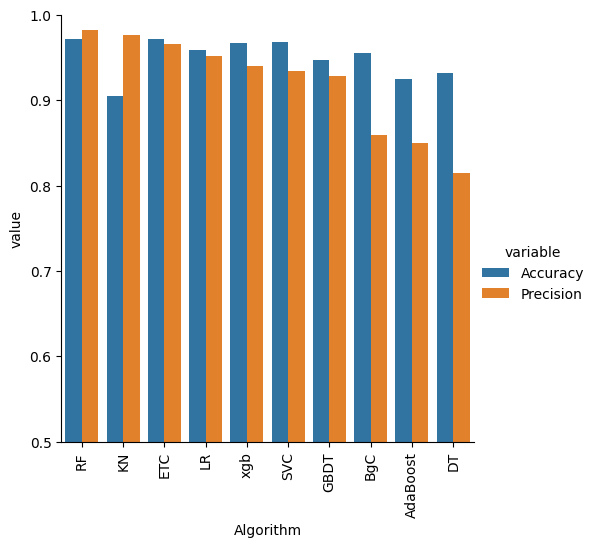

In [83]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# model improve

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [87]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [88]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [90]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812
3,LR,0.958414,0.952381,0.958414,0.952381,0.958414,0.952381,0.958414,0.952381
4,xgb,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678
5,SVC,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884
6,GBDT,0.947776,0.928571,0.947776,0.928571,0.947776,0.928571,0.947776,0.928571
7,BgC,0.955513,0.859375,0.955513,0.859375,0.955513,0.859375,0.955513,0.859375
8,AdaBoost,0.925532,0.850575,0.925532,0.850575,0.925532,0.850575,0.925532,0.850575
9,DT,0.932302,0.814815,0.932302,0.814815,0.932302,0.814815,0.932302,0.814815


In [91]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [92]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [93]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [94]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9743589743589743


In [95]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [98]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.944


In [99]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))